In [1039]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


import warnings
warnings.filterwarnings('ignore')   # para quitar esos prints

pd.set_option('display.max_columns', None) 

In [1040]:
Sharkattacks = pd.read_csv('attacks.csv', encoding = 'ISO 8859-1')

In [1041]:
type(Sharkattacks)

pandas.core.frame.DataFrame

In [1042]:
len(Sharkattacks.duplicated())

25723

In [1043]:
type(Sharkattacks)


pandas.core.frame.DataFrame

In [1044]:
Sharkattacks = Sharkattacks.drop_duplicates()


In [1045]:
Sharkattacks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   obje

In [1046]:
Sharkattacks['Year'] = Sharkattacks['Year'].astype('object')

In [1047]:
Sharkattacks.isnull().sum()

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

In [1048]:
Sharkattacks.loc[Sharkattacks['Unnamed: 22'].notnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [1049]:
Sharkattacks.loc[Sharkattacks['Unnamed: 23'].notnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [1050]:
#Sharkattacks.loc[Sharkattacks['Unnamed: 22', 'Unnamed: 23'].drop()

#Sharkattacks = Sharkattacks.dropna(thresh=6000, axis=1) Ca´nt eliminate columns


Sharkattacks = Sharkattacks.drop([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 8702, 25722], axis= 0)

Sharkattacks.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [1051]:
#Mucho problemas con los nombres. Rename
Sharkattacks.rename(columns={'Case Number' : 'Case number', 'Sex ': 'Sex', 'Fatal (Y/N)' : 'Fatal', 'Species ' : 'Species', 'pdf' : 'Pdf doc', 'href formula': 'Href formula', 'href':'Href', 'original order' : 'Original order'}, inplace=True)

Sharkattacks.columns

Index(['Case number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'Pdf doc', 'Href formula', 'Href',
       'Case Number.1', 'Case Number.2', 'Original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [1052]:
Sharkattacks.loc[Sharkattacks['Year'].isnull()]

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN


In [1053]:
Sharkattacks.loc[Sharkattacks['Type'].isna()]

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0,NaN,NaN
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,NaN,NaN
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0,NaN,NaN
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0,NaN,NaN


In [1054]:
Sharkattacks.loc[Sharkattacks['Original order'].isna()]

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23


In [1055]:
Sharkattacks['Year'] = Sharkattacks['Year'].astype(str)

In [1056]:
Sharkattacks['Fatal']

0             N
1             N
2             N
3             N
4             N
5             N
6             Y
7             N
8             N
9             N
10            N
11            N
12            N
13            N
14            N
15            N
16            N
17            N
18            N
19            N
20            N
21            N
22            N
23            N
24            N
25            N
26            N
27          NaN
28            N
29            N
30            N
31            N
32            N
33            N
34            N
35            N
36            N
37            N
38            N
39            N
40            N
41            N
42            N
43            N
44            N
45            N
46            N
47            N
48            N
49            N
50            N
51            N
52            N
53            N
54            N
55            N
56            N
57            N
58            Y
59            Y
60            N
61            N
62      

In [1057]:
Sharkattacks = Sharkattacks.fillna({'Case number': 'Look at the end of the table', 'Year':'Manny moons ago', 'Type': 'Asking for it', 'Country': 'Carmen Sandiego', 'Area': '51', 'Location': 'Wally', 'Activity': 'Water activity', 'Name': 'John/Jane Doe', 'Sex': '<--Who´s asking?', 'Age': '0 to 99', 'Injury': 'Ouch', 'Fatal': 'Schrödinger', 'Time':'Is relative', 'Species': 'Ellasmobranquii sp', 'Investigator or Source': 'Mulder & Scully', 'Href formula' : '-->'})


#Sharkattacks[Sharkattacks['Location'].str.contains('Wally')]

#Sharkattacks[Sharkattacks['Name'].str.contains('John/Jane Doe')]


In [1058]:
Sharkattacks.isnull().sum()

Case number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                         0
Location                     0
Activity                     0
Name                         0
Sex                          0
Age                          0
Injury                       0
Fatal                        0
Time                         0
Species                      0
Investigator or Source       0
Pdf doc                      0
Href formula                 0
Href                         0
Case Number.1                0
Case Number.2                0
Original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [1059]:
Sharkattacks[Sharkattacks['Href formula'].isnull()]

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23


In [1060]:
Sharkattacks.shape

(6302, 24)

In [1061]:
Sharkattacks.columns

Index(['Case number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'Pdf doc', 'Href formula', 'Href',
       'Case Number.1', 'Case Number.2', 'Original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [1062]:
#Sharkattacks._get_numeric_data().groupby('Date').sum()

In [1063]:
Sharkattacks['Case Number.2']  #All Case number columns have the same info

0               2018.06.25
1               2018.06.18
2               2018.06.09
3               2018.06.08
4               2018.06.04
5             2018.06.03.b
6             2018.06.03.a
7               2018.05.27
8             2018.05.26.b
9             2018.05.26.a
10              2018.05.24
11              2018.05.21
12            2018.05.13.b
13            2018.05.13.a
14              2018.05.00
15              2018.05.12
16              2018.05.09
17            2018.04.30.R
18            2018.04.28.b
19            2018.04.28.a
20            2018.04.25.b
21            2018.04.25.a
22              2018.04.24
23              2018.04.23
24              2018.04.22
25              2018.04.19
26            2018.04.15.d
27            2018.04.15.c
28            2018.04.15.b
29            2018.04.15.a
30              2018.04.14
31            2018.04.10.R
32              2018.04.09
33              2018.04.05
34              2018.04.03
35              2018.03.31
36              2018.03.14
3

In [1064]:
#Merge all 3 'Case number' columns

#Sharkattacks['Merged case numbers'] = list(zip(Sharkattacks['Case number'], Sharkattacks['Case Number.1'], Sharkattacks['Case Number.2']))

#Sharkattacks['Merged case numbers'] Useless. Only means 3 values in one column. I need to overwrite.

#Sharkattacks
if Sharkattacks['Case number'].equals(Sharkattacks['Case Number.1']) and Sharkattacks['Case number'].equals(Sharkattacks['Case Number.2']) and Sharkattacks['Case number.1'].equals(Sharkattacks['Case Number.2']):
    print('col1, col2, and col3 have identical values')
else:
    print('col1, col2, and col3 do not have identical values')



col1, col2, and col3 do not have identical values


In [1065]:
Sharkattacks['Case number'] = (Sharkattacks['Case number'].astype(str)).str.replace(r'[^\d.]+', '')


list (Sharkattacks['Case number'])
#Sharkattacks['Case number'].apply(lambda x: re.sub(r'[^\d\W]+', '', x))


#Sharkattacks[Sharkattacks['Case number'].str.contains('a')]['Case number'] #664 veces

#Sharkattacks[Sharkattacks['Case number'].str.contains('b')]['Case number'] #649 veces

#Sharkattacks[Sharkattacks['Case number'].str.contains('c')]['Case number'] #136 veces

#Sharkattacks[Sharkattacks['Case number'].str.contains('R')]['Case number'] #562 veces

#Sharkattacks[Sharkattacks['Case number'].str.contains('h')]['Case number']

# Sharkattacks['Case number'] = Sharkattacks['Case number'].str.slice(stop=-1) THIS WORKS



#WHY ISN´T IT WORKING??



['2018.06.25',
 '2018.06.18',
 '2018.06.09',
 '2018.06.08',
 '2018.06.04',
 '2018.06.03.b',
 '2018.06.03.a',
 '2018.05.27',
 '2018.05.26.b',
 '2018.05.26.a',
 '2018.05.24',
 '2018.05.21',
 '2018.05.13.b',
 '2018.05.13.a',
 '2018.05.00',
 '2018.05.12',
 '2018.05.09',
 '2018.04.30.R',
 '2018.04.28.b',
 '2018.04.28.a',
 '2018.04.25.b',
 '2018.04.25.a',
 '2018.04.24',
 '2018.04.23',
 '2018.04.22',
 '2018.04.19',
 '2018.04.15.d',
 '2018.04.15.c',
 '2018.04.15.b',
 '2018.04.15.a',
 '2018.04.14',
 '2018.04.10.R',
 '2018.04.09',
 '2018.04.05',
 '2018.04.03',
 '2018.03.31',
 '2018.03.14',
 '2018.03.09.b',
 '2018.03.09.a',
 '2018.02.24',
 '2018.02.23',
 '2018.02.17',
 '2018.02.15',
 '2018.02.14',
 '2018.02.11',
 '2018.02.03',
 '2018.02.01',
 '2018.01.28',
 '2018.01.21',
 '2018.01.14',
 '2018.01.13',
 '2018.01.12',
 '2018.01.05',
 '2017.12.31',
 '2017.12.30',
 '2017.12.21',
 '2017.12.09',
 '2017.11.30.b',
 '2017.11.30.a',
 '2017.11.25.R',
 '2017.11.24',
 '2017.11.18',
 '2017.11.13.R',
 '2017.11.1

In [1066]:
#Sharkattacks['Case number'] = to_datetime(Sharkattacks['Case number'], errors='coerce')
#Sharkattacks['Case number'] = Sharkattacks['Case number'].dt.strftime('%Y-%m-%d')

In [1067]:
#Where do Case number 1 and 2 differ? They have the 
Mask12 = Sharkattacks['Case Number.1'] != Sharkattacks['Case Number.2']

Sharkattacks[Mask12].index


Index([  34,  117,  144,  217,  314,  334,  339,  560, 3522, 3795, 3880, 4403,
       4425, 5275, 5358, 5386, 5777, 5883, 6009, 6122],
      dtype='int64')

In [1068]:
Mask01 = Sharkattacks['Case number'] != Sharkattacks['Case Number.1']

Sharkattacks[Mask01].index

Index([  34,  117,  144,  217,  314,  334,  339,  390,  560, 3522, 3795, 3880,
       4403, 4425, 4949, 5275, 5358, 5386, 5488, 5777, 5883, 5944, 6009, 6122],
      dtype='int64')

In [1069]:
Mask02 = Sharkattacks['Case number'] != Sharkattacks['Case Number.2']

Sharkattacks[Mask02].index

Index([390, 4949, 5488, 5944], dtype='int64')

In [1070]:
print(len(Sharkattacks[Mask01].index), len(Sharkattacks[Mask02].index), len(Sharkattacks[Mask12].index))

24 4 20


In [1071]:
# Rows that are different in ALL: 390, 4949, 6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 8702, 25722
#Rows different btween 0 and 1 ONLY: None   0 and 2: None   1 and 2: None
Sharkattacks['Case number'][4949]

'1934.01.08.R'

In [1072]:
Hrefcheck = Sharkattacks['Href formula'] != Sharkattacks['Href']

Sharkattacks[Hrefcheck].index

Index([  50,   96,  131,  133,  141,  168,  234,  241,  276,  324,  332,  352,
        401,  453,  484,  485,  486,  493,  494,  515,  527,  545,  569,  583,
        584,  585,  586,  587,  588,  590,  600,  601,  602,  603,  604,  605,
        606,  607,  671,  672, 1046, 1441, 1442, 2702, 3244, 3245, 3775, 3829,
       4143, 4154, 4621, 4872, 4898, 4949, 5245, 5349, 5556, 5701, 6110, 6166],
      dtype='int64')

In [1073]:

Hrefnull= Sharkattacks['Href formula'].isnull()
Hrefnullrows = Sharkattacks[Hrefnull]
Hrefnullrows


#Just move Href formula to end of dataframe, para que no moleste

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23


In [1074]:
'''movercolumna = Sharkattacks.pop('Href formula')
Sharkattacks.insert(len(Sharkattacks.columns), 'Href formula', movercolumna)
Sharkattacks


def cross_out_text(value):
    return '<strike>{}</strike>'.format(value)
Sharkattacks.style.format({'Href formula': cross_out_text})'''

Sharkattacks['Href formula'] = Sharkattacks['Href formula'].apply(lambda x: '<s>' + x + '</s>')

#No way to properly cross out the text, to avoid the same information being displayed twice.

Sharkattacks.head(5)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0 to 99,Minor injury to lower leg,N,Is relative,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0 to 99,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Is relative,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [1075]:
Sharkattacks.groupby('Species')['Injury'].sum()

Species
                                                                                                                                                                                                        Minor injury, small lacerations to right footL...
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4']                                                                                                                                                                       Tiny cuts & bruises on neck  
 1.5 m [5'] dusky shark                                                                                                                                                                                 Punctures in wetsuit & left arm bruised by cap...
 6' to 8' shark                                                                                                                                                                                                                  Left arm and leg 

In [1076]:
#White_sharks = Sharkattacks.groupby('Species')['Species'].apply(lambda x: x.str.count('white shark').sum())
#White_sharks


Sharkattacks['Species'].str.count('White shark').sum()

436

In [1077]:
Sharkattacks['Species']= Sharkattacks['Species'].str.lower()

'''Sharkattacks['Species']= Sharkattacks['Species'].replace('White', 'white')
Sharkattacks['Species']= Sharkattacks['Species'].replace('Tiger', 'tiger')'''

"Sharkattacks['Species']= Sharkattacks['Species'].replace('White', 'white')\nSharkattacks['Species']= Sharkattacks['Species'].replace('Tiger', 'tiger')"

In [1078]:
Sharkattacks['Species']

0                                             white shark
1                                      ellasmobranquii sp
2                                      ellasmobranquii sp
3                                               2 m shark
4                                         tiger shark, 3m
5                                      ellasmobranquii sp
6                                             tiger shark
7                                         lemon shark, 3'
8                                          bull shark, 6'
9                                      ellasmobranquii sp
10                                        grey reef shark
11                                     ellasmobranquii sp
12                                     ellasmobranquii sp
13                                       invalid incident
14                                  tawny nurse shark, 2m
15                                     ellasmobranquii sp
16                        shark involvement not confirmed
17            

In [1079]:
#Sharkattacks['Species'].str.count('shark').sum()
len(Sharkattacks['Species'].unique())

1536

In [1080]:
list(Sharkattacks['Type'].unique())

['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Asking for it',
 'Boat',
 'Boatomg']

In [1081]:
Sharkattacks['Type']= Sharkattacks['Type'].replace('Boatomg', 'Boating')
Sharkattacks['Type']= Sharkattacks['Type'].replace('Boat', 'Boating') #Reduce different possibilities

In [1082]:
list(Sharkattacks['Type'].unique())

['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Asking for it']

In [1083]:
Sharkattacks.loc[Sharkattacks['Sex']== '<--Who´s asking?'].head(10)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,51,"Magenta Beach, Noumea",Windsurfing,John/Jane Doe,<--Who´s asking?,0 to 99,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0,NaN,NaN
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,51,Gars Garabulli,2 boats capsized,31 migrants,<--Who´s asking?,0 to 99,FATAL,Y,Is relative,some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0,NaN,NaN
86,2017.09.14,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,John/Jane Doe,<--Who´s asking?,0 to 99,"sharks rammed boats, no injury to occupants",N,Is relative,"white shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0,NaN,NaN
124,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,John/Jane Doe,<--Who´s asking?,0 to 99,"Skull found in shark, a probable drowning & sc...",Schrödinger,Is relative,shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0,NaN,NaN
154,2017.04.17.b,17-Apr-2017,2017.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Water activity,John/Jane Doe,<--Who´s asking?,0 to 99,Minor bite to the foot,N,Afternoon,ellasmobranquii sp,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0,NaN,NaN
179,2017.02.01.b,01-Feb-2017,2017.0,Boating,USA,South Carolina,16 miles off Hilton Head,Tagging sharks,Chip Michelove & crew,<--Who´s asking?,0 to 99,"Shark bit boat, no injury to occupants",N,Is relative,"white shark, female, 14'","YouTube, 2/2/2017",2017.02.01.b-Boat.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.02.01.b,2017.02.01.b,6124.0,NaN,NaN
218,2016.09.15.R,15-Sep-2016,2016.0,Boating,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,<--Who´s asking?,0 to 99,Shark rammed boat. No injury to occupant,N,Is relative,ellasmobranquii sp,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,6085.0,NaN,NaN
226,2016.09.00,Sep-2016,2016.0,Invalid,MEXICO,51,Guadalupe Island,Cage Diving,John/Jane Doe,<--Who´s asking?,0 to 99,"No injury to divers, white shark breached cage",Schrödinger,Is relative,invalid,K. Yonker,2016.09.00-Breach.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.00,2016.09.00,6077.0,NaN,NaN
243,2016.07.17,17-Jul-2016,2016.0,Boating,USA,Alabama,8 miles off Mobile,Fishing in Alabama Deep Fishing Rodeo,Occupant: Ben Raines,<--Who´s asking?,0 to 99,"No injury, shark bit trolling motor",N,Is relative,"tiger shark, 10'","Al.com, 7/19/2016",2016.07.17-Gulf.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.17,2016.07.17,6060.0,NaN,NaN
297,2016.03.13,13-Mar-2016,2016.0,Invalid,USA,California,"Bolsa Chica State Park, Orange County",Surfing,unknown,<--Who´s asking?,0 to 99,Board reportedly bumped by shark. No injury,Schrödinger,Morning,shark involveme

In [1084]:
list(Sharkattacks['Fatal'].unique())

['N', 'Y', 'Schrödinger', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y']

In [1085]:
Sharkattacks['Fatal']= Sharkattacks['Fatal'].replace(' N', 'N')
Sharkattacks['Fatal']= Sharkattacks['Fatal'].replace('N ', 'N')
Sharkattacks['Fatal']= Sharkattacks['Fatal'].replace('y', 'Y')
Sharkattacks['Fatal']= Sharkattacks['Fatal'].replace('M', 'N')
Sharkattacks['Fatal']= Sharkattacks['Fatal'].replace('UNKNOWN', 'Schrödinger')
Sharkattacks['Fatal']= Sharkattacks['Fatal'].replace('2017', 'N')


In [1086]:
Sharkattacks.loc[Sharkattacks['Fatal']== '2017']

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23


In [1087]:
list(Sharkattacks['Year'].unique())

['2018.0',
 '2017.0',
 'nan',
 '2016.0',
 '2015.0',
 '2014.0',
 '2013.0',
 '2012.0',
 '2011.0',
 '2010.0',
 '2009.0',
 '2008.0',
 '2007.0',
 '2006.0',
 '2005.0',
 '2004.0',
 '2003.0',
 '2002.0',
 '2001.0',
 '2000.0',
 '1999.0',
 '1998.0',
 '1997.0',
 '1996.0',
 '1995.0',
 '1984.0',
 '1994.0',
 '1993.0',
 '1992.0',
 '1991.0',
 '1990.0',
 '1989.0',
 '1969.0',
 '1988.0',
 '1987.0',
 '1986.0',
 '1985.0',
 '1983.0',
 '1982.0',
 '1981.0',
 '1980.0',
 '1979.0',
 '1978.0',
 '1977.0',
 '1976.0',
 '1975.0',
 '1974.0',
 '1973.0',
 '1972.0',
 '1971.0',
 '1970.0',
 '1968.0',
 '1967.0',
 '1966.0',
 '1965.0',
 '1964.0',
 '1963.0',
 '1962.0',
 '1961.0',
 '1960.0',
 '1959.0',
 '1958.0',
 '1957.0',
 '1956.0',
 '1955.0',
 '1954.0',
 '1953.0',
 '1952.0',
 '1951.0',
 '1950.0',
 '1949.0',
 '1948.0',
 '1848.0',
 '1947.0',
 '1946.0',
 '1945.0',
 '1944.0',
 '1943.0',
 '1942.0',
 '1941.0',
 '1940.0',
 '1939.0',
 '1938.0',
 '1937.0',
 '1936.0',
 '1935.0',
 '1934.0',
 '1933.0',
 '1932.0',
 '1931.0',
 '1930.0',
 '

In [1088]:
list(Sharkattacks['Sex'].unique())

['F', 'M', '<--Who´s asking?', 'M ', 'lli', 'N', '.']

In [1089]:
Sharkattacks['Sex']= Sharkattacks['Sex'].replace('M ', 'M')
Sharkattacks['Sex']= Sharkattacks['Sex'].replace('N', 'M')
Sharkattacks['Sex']= Sharkattacks['Sex'].replace('lli', 'M')
Sharkattacks['Sex']= Sharkattacks['Sex'].replace('.', '<--Who´s asking?')

Sharkattacks['Sex'].unique()

array(['F', 'M', '<--Who´s asking?'], dtype=object)

In [1090]:
len(Sharkattacks.loc[Sharkattacks['Area']== 'Hawaii'])

298

In [1091]:
len(Sharkattacks.loc[Sharkattacks['Country']== 'JAPAN'])

34

In [1092]:
(Sharkattacks['Country'].unique())

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'Carmen Sandiego', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, British overseas territory',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & C

In [1093]:
len(Sharkattacks['Date'].unique())

5433

In [1094]:
Sharkattacks.sort_values(by='Year').head(10)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,Is relative,ellasmobranquii sp,S.W. Baker,ND-0001-Ceylon.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6209,ND.0110,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,Wally,Spearfishing,4 French divers,M,0 to 99,"FATAL (x3), one survived with minor injuries",Y,Is relative,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,ND-0110-FrenchDivers.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0110,ND.0110,94.0,NaN,NaN
6210,ND-0109,Before 2006,0.0,Unprovoked,USA,Florida,"Tampa Bay, Hillsborough County",Wade-fishing,Ed Snyder,M,0 to 99,"No injury, shark rammed his back",N,Is relative,ellasmobranquii sp,Fishingworld.com,ND-0109-Ed-Snyder.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0109,ND-0109,93.0,NaN,NaN
6211,ND-0108,Before 2003,0.0,Unprovoked,GREECE,Dodecanese Islands,Near Symi Island,Free diving for sponges,male,M,0 to 99,FATAL,Y,Is relative,ellasmobranquii sp,M. Kalafatas,ND-0108-SpongeDiver-Symi.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0108,ND-0108,92.0,NaN,NaN
6212,ND-0107,Before 2004,0.0,Boating,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",<--Who´s asking?,0 to 99,"No injury to occupants, shark bumped boat",N,Is relative,whale shark,South African Shark Attack File,ND-0107-Inhambane.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0107,ND-0107,91.0,NaN,NaN
6213,ND-0106,Before 1962,0.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Murray Bay, Robben Island",Swimming,"male, a mental patient",M,0 to 99,"FATAL, body not recovered",Y,Is relative,ellasmobranquii sp,"L.Green, A Decent Fellow doesn't Work, p.225",ND-0106-MentalPatient.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0106,ND-0106,90.0,NaN,NaN
6214,ND.0104,1950s,0.0,Unprovoked,AUSTRALIA,Torres Strait,Wally,Helmet diving,male,M,0 to 99,"No injury, helmet bitten",N,Is relative,tiger shark,"A. Seekee & R. Callinan, Courier-Mail, 7/7/199...",ND-0104-HelmetDiver.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0104,ND.0104,89.0,NaN,NaN
6215,ND.0102,"No date, Before 1963",0.0,Unprovoked,BAHREIN,51,Wally,Pearl diving,male,M,0 to 99,FATAL,Y,Is relative,tiger shark,A.C. Doyle,ND-0102-Bahrein.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0102,ND.0102,88.0,NaN,NaN
6216,ND.0100,2003?,0.0,Unprovoked,BAHAMAS,Andros Islands,Great Guana Cay,Spearfishing,C.D. Dollar,M,0 to 99,Swim fin bitten,N,Is relative,1.8 m [6'] shark,"R.D. Weeks, GSAF",ND-0100-CDDollar.pdf,<s>Q93http://sharkattackfile.net/spreadsheets/...,Q93http://sharkattackfile.net/spreadsheets/pdf...,ND.0100,ND.0100,87.0,NaN,NaN
6217,ND.0097,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,0 to 99,Hand bitten,N,Is relative,ellasmobranquii sp,Internet,ND-0097-PaulMenta.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0097,ND.0097,86.0,NaN,NaN


In [1095]:
Sharkattacks['Year'] = Sharkattacks['Year'].replace('0.0', '<--')

In [1096]:
Sharkattacks.loc[Sharkattacks['Country']== 'SPAIN'].head(10)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
82,2017.09.16.b,16-Sep-2017,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,Lacerations to right foot,N,Is relative,"porbeagle, 1.5 m",Turismo La Aldea,2017.09.16.b-GrandCanary.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.16.b,2017.09.16.b,6221.0,NaN,NaN
98,2017.08.26.b,26-Aug-2017,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,Schrödinger,Midday,shark involvement questionable,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.b,2017.08.26.b,6205.0,NaN,NaN
113,2017.07.23.a,23-Jul-2017,2017.0,Unprovoked,SPAIN,Majorca,"Estanys Beach, Colonia de Sant",Swimming,female,F,0 to 99,Abrasion to arm from shark's rough skin,N,Afternoon,blue shark 6',"Daily Record, 7/24/2017",2017.07.23.a-Majorca.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.23.a,2017.07.23.a,6190.0,NaN,NaN
130,2017.06.17,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa den Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,ellasmobranquii sp,"Diario de Ibiza, 6/17/'2017",2017.06.17-Spain.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.17,2017.06.17,6173.0,NaN,NaN
234,2016.07.29,29-Jul-2016,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,40,Lacerations to right hand,N,11h30,blue shark,"Informacion.es, 7/29/2016",2016.07.29-Spain.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.29,2016.07.29,6069.0,NaN,NaN
249,2016.07.08.R,Reported 08-Jul-2016,2016.0,Unprovoked,SPAIN,Canary Islands,"Las Teresitas, Tenerife",Wading,female,F,10,"5 tiny puncture marks to lower leg, treated wi...",N,Is relative,angel shark,La Opinion de Tenerife,2016.07.08.R-Spain.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.08.R,2016.07.08.R,6054.0,NaN,NaN
321,2015.12.25,25-Dec-2015,2015.0,Unprovoked,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,Cristina Ojeda-Thies,F,38,Lacerations to left forearm,N,Is relative,"silky shark, 6.5'","Diaro de Visos, 12/26/2015",2015.12.25-GrandCanary.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.25,2015.12.25,5982.0,NaN,NaN
378,2015.08.18.a,18-Aug-2015,2015.0,Invalid,SPAIN,Alicante,"Poniente Beach, Benidorm",Swimming,male,M,10,Minor injury when he attempted to touch a fish.,Schrödinger,11h00,shark involvement not confirmed,"The Local, 8/18/2015",2015.08.18.a-Benidorm.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.08.18.a,2015.08.18.a,5925.0,NaN,NaN
471,2014.12.03.R,Reported 03-Dec-2014,2014.0,Provoked,SPAIN,Granada,Off Motril,Fishing for blue sharks,male,M,0 to 99,Glancing bite to wrist from netted shark PROVO...,N,07h00,ellasmobranquii sp,"ABCandalucia, 12/3/2014",2014.12.03.R-Spanish-fisherman.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.12.03.R,2014.12.03.R,5832.0,NaN,NaN
504,2014.09.00,Sep-2014,2014.0,Unprovoked,SPAIN,Catalonia,Salou,Playing with an air mattress,male,M,16,Lacerations to right hand,N,Is relative,ellasmobranquii sp,"A. Brenneka, Shark Attack Survivors",2014.09.00-Salou.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.09.00,2014.09.00,5799.0,NaN,NaN


In [1097]:
len(Sharkattacks.loc[Sharkattacks['Year']== '0.0'])

0

In [1098]:
'''Sharkattacks['Age'] = pd.to_numeric(Sharkattacks['Age'], errors='coerce')

# Use boolean indexing to identify all iterations where pd.to_numeric() returned NaN
non_numeric_iterations = Sharkattacks[Sharkattacks['Age'].isna()]

# Display the non-numeric iterations
Sharkattacks['Age'].head(20)'''

"Sharkattacks['Age'] = pd.to_numeric(Sharkattacks['Age'], errors='coerce')\n\n# Use boolean indexing to identify all iterations where pd.to_numeric() returned NaN\nnon_numeric_iterations = Sharkattacks[Sharkattacks['Age'].isna()]\n\n# Display the non-numeric iterations\nSharkattacks['Age'].head(20)"

In [1099]:
'''Sharkattacks = Sharkattacks.fillna({'Case number': 'Look at the end of the table', 'Year':'Manny moons ago', 'Type': 'Asking for it', 'Country': 'Carmen Sandiego', 'Area': '51', 'Location': 'Wally', 'Activity': 'Water activity', 'Name': 'John/Jane Doe', 'Sex': '<--Who´s asking?', 'Age': '0 to 99', 'Injury': 'Ouch', 'Fatal': 'Schrödinger', 'Time':'Is relative', 'Species': 'Ellasmobranquii sp', 'Investigator or Source': 'Mulder & Scully', 'Href formula' : '-->'})

Sharkattacks['Age'].head(20)'''

"Sharkattacks = Sharkattacks.fillna({'Case number': 'Look at the end of the table', 'Year':'Manny moons ago', 'Type': 'Asking for it', 'Country': 'Carmen Sandiego', 'Area': '51', 'Location': 'Wally', 'Activity': 'Water activity', 'Name': 'John/Jane Doe', 'Sex': '<--Who´s asking?', 'Age': '0 to 99', 'Injury': 'Ouch', 'Fatal': 'Schrödinger', 'Time':'Is relative', 'Species': 'Ellasmobranquii sp', 'Investigator or Source': 'Mulder & Scully', 'Href formula' : '-->'})\n\nSharkattacks['Age'].head(20)"

In [1100]:
'''Sharkattacks.loc[Sharkattacks['Age'] != '0 to 99', 'Age'] = Sharkattacks.loc[Sharkattacks['Age'] != '0 to 99', 'Age'].astype(int)


def categorize_age(Value):
    for Value in Sharkattacks['Age']:
        if Value < 10:
            return '0 to 9'
        elif Value < 20:
            return '10 to 19'
        elif Value < 30:
            return '20 to 29'
        elif Value < 40:
            return '30 to 39'
        elif Value < 50:
            return '40 to 49'
        elif Value < 60:
            return '50 to 59'
        elif Value < 70:
            return '60 to 69'
        elif Value < 80:
            return '70 to 79'
        elif Value < 90:
            return '80 to 89'
        elif Value <=99:
            return '90 to 99'
        else: 
            return '0 to 99'

# Apply the function to the column and create a new column with the categories
Sharkattacks['Age'].head(10)
# Display the dataframe'''

"Sharkattacks.loc[Sharkattacks['Age'] != '0 to 99', 'Age'] = Sharkattacks.loc[Sharkattacks['Age'] != '0 to 99', 'Age'].astype(int)\n\n\ndef categorize_age(Value):\n    for Value in Sharkattacks['Age']:\n        if Value < 10:\n            return '0 to 9'\n        elif Value < 20:\n            return '10 to 19'\n        elif Value < 30:\n            return '20 to 29'\n        elif Value < 40:\n            return '30 to 39'\n        elif Value < 50:\n            return '40 to 49'\n        elif Value < 60:\n            return '50 to 59'\n        elif Value < 70:\n            return '60 to 69'\n        elif Value < 80:\n            return '70 to 79'\n        elif Value < 90:\n            return '80 to 89'\n        elif Value <=99:\n            return '90 to 99'\n        else: \n            return '0 to 99'\n\n# Apply the function to the column and create a new column with the categories\nSharkattacks['Age'].head(10)\n# Display the dataframe"

In [1123]:
list(Sharkattacks['Type'].unique())

['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Asking for it']

4595

In [1102]:
CounSex = (Sharkattacks.groupby('Country')['Sex'].value_counts())

CounSex.loc['JAPAN']

Sex
M                   29
<--Who´s asking?     5
Name: count, dtype: int64

In [1103]:
TySex = Sharkattacks.groupby('Type')['Sex'].value_counts()

TySex.loc['Asking for it']

Sex
M    4
Name: count, dtype: int64

In [1104]:
TyFat = Sharkattacks.groupby('Type')['Fatal'].value_counts()

TyFat.loc['Asking for it']



Fatal
Y              2
Schrödinger    1
N              1
Name: count, dtype: int64

In [1105]:
SeFat = Sharkattacks.groupby('Sex')['Fatal'].value_counts()

SeFat.loc['<--Who´s asking?']

Fatal
N              349
Schrödinger    109
Y              108
Name: count, dtype: int64

In [1106]:
OHESex = pd.get_dummies(Sharkattacks['Sex'])
OHEsex = OHESex.astype(int)
OHEsex.head(5)



,<--Who´s asking?,F,M
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [1107]:
OHEType = pd.get_dummies(Sharkattacks['Type'])
OHEType = OHEType.astype(int)
OHEType.head(5)

,Asking for it,Boating,Invalid,Provoked,Questionable,Sea Disaster,Unprovoked
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0


In [1108]:
OHEFatal = pd.get_dummies(Sharkattacks['Fatal'])
OHEFatal = OHEFatal.astype(int)

OHEFatal.head(10)

,N,Schrödinger,Y
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


In [1109]:
OHESexFat = pd.get_dummies(Sharkattacks[['Sex', 'Fatal']])

OHESexFat = OHESexFat.astype(int)

OHESexFat.head(10)

,Sex_<--Who´s asking?,Sex_F,Sex_M,Fatal_N,Fatal_Schrödinger,Fatal_Y
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,0,0,1,1,0,0
3,0,0,1,1,0,0
4,0,0,1,1,0,0
5,0,0,1,1,0,0
6,0,0,1,0,0,1
7,0,0,1,1,0,0
8,0,0,1,1,0,0
9,0,0,1,1,0,0


In [1110]:
'''OHEAge = pd.get_dummies(Sharkattacks[['Age']])

OHEAge = OHEAge.astype(int)

OHEAge.head(10)'''

"OHEAge = pd.get_dummies(Sharkattacks[['Age']])\n\nOHEAge = OHEAge.astype(int)\n\nOHEAge.head(10)"

In [1111]:
Sharkattacks.head(5)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0 to 99,Minor injury to lower leg,N,Is relative,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0 to 99,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Is relative,"tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [1112]:
OHEFatal.head(5)
OHEType.head(5)
OHEsex.head(5)

#All are numbers

,<--Who´s asking?,F,M
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [1113]:
Sharkattacks = pd.concat([Sharkattacks, OHEFatal], axis=1)

Sharkattacks.head(5)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23,N,Schrödinger,Y
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,1,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,1,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,1,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0 to 99,Minor injury to lower leg,N,Is relative,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,1,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0 to 99,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Is relative,"tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,1,0,0


In [1114]:
Sharkattacks = pd.concat([Sharkattacks, OHEType], axis=1)

Sharkattacks.head(5)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23,N,Schrödinger,Y,Asking for it,Boating,Invalid,Provoked,Questionable,Sea Disaster,Unprovoked
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,1,0,0,0,1,0,0,0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,1,0,0,0,0,0,0,0,0,1
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,1,0,0,0,0,1,0,0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0 to 99,Minor injury to lower leg,N,Is relative,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,1,0,0,0,0,0,0,0,0,1
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0 to 99,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Is relative,"tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,1,0,0,0,0,0,1,0,0,0


In [1115]:
Sharkattacks = pd.concat([Sharkattacks, OHEsex], axis=1)
#Sharkattacks = Sharkattacks.iloc[:, :-3]
Sharkattacks.head(5)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Pdf doc,Href formula,Href,Case Number.1,Case Number.2,Original order,Unnamed: 22,Unnamed: 23,N,Schrödinger,Y,Asking for it,Boating,Invalid,Provoked,Questionable,Sea Disaster,Unprovoked,<--Who´s asking?,F,M
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,ellasmobranquii sp,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,1
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0 to 99,Minor injury to lower leg,N,Is relative,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0 to 99,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Is relative,"tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,<s>http://sharkattackfile.net/spreadsheets/pdf...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,1


In [1116]:
'''Sharkattacks = pd.concat([Sharkattacks, OHEAge], axis=1)
#Sharkattacks = Sharkattacks.iloc[:, :-3]
Sharkattacks.head(5)'''

'Sharkattacks = pd.concat([Sharkattacks, OHEAge], axis=1)\n#Sharkattacks = Sharkattacks.iloc[:, :-3]\nSharkattacks.head(5)'

In [1117]:
Sharkattacks._get_numeric_data().corr()

,Original order,N,Schrödinger,Y,Asking for it,Boating,Invalid,Provoked,Questionable,Sea Disaster,Unprovoked,<--Who´s asking?,F,M
Original order,1.000000,0.323312,-0.047077,-0.329406,0.005413,-0.007379,-0.018157,-0.021319,0.030679,-0.136596,0.086237,-0.074579,0.158443,-0.067268
N,0.323312,1.000000,-0.480299,-0.780112,-0.023437,0.129862,-0.435370,0.187321,0.012144,-0.173484,0.163833,-0.044678,0.037392,0.003824
Schrödinger,-0.047077,-0.480299,1.000000,-0.174065,0.013058,-0.052204,0.899820,-0.094304,-0.005833,-0.050948,-0.461026,0.101761,0.000609,-0.074499
Y,-0.329406,-0.780112,-0.174065,1.000000,0.016998,-0.108560,-0.153049,-0.143040,-0.009474,0.231114,0.144913,-0.022426,-0.042415,0.048847
Asking for it,0.005413,-0.023437,0.013058,0.016998,1.000000,-0.006028,-0.007770,-0.007978,-0.000449,-0.005004,-0.041348,-0.007916,-0.008451,0.012241
Boating,-0.007379,0.129862,-0.052204,-0.108560,-0.006028,1.000000,-0.073738,-0.075713,-0.004261,-0.047487,-0.392413,0.432676,-0.059261,-0.269322
Invalid,-0.018157,-0.435370,0.899820,-0.153049,-0.007770,-0.073738,1.000000,-0.097595,-0.005493,-0.061211,-0.505821,0.049031,0.012546,-0.045293
Provoked,-0.021319,0.187321,-0.094304,-0.143040,-0.007978,-0.075713,-0.097595,1.000000,-0.005640,-0.062851,-0.519374,0.010508,-0.065900,0.042901
Questionable,0.030679,0.012144,-0.005833,-0.009474,-0.000449,-0.004261,-0.005493,-0.005640,1.000000,-0.003538,-0.029233,-0.005597,-0.005975,0.008654
Sea Disaster,-0.136596,-0.173484,-0.050948,0.231114,-0.005004,-0.047487,-0.061211,-0.062851,-0.003538,1.000000,-0.325748,0.129396,-0.041774,-0.062096


In [1118]:
CorrelNum =Sharkattacks._get_numeric_data().corr()
CorrelNum= CorrelNum.round(2)

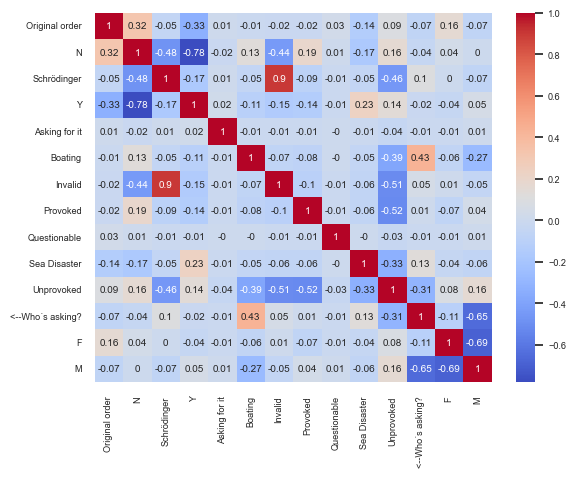

In [1122]:
sns.heatmap(CorrelNum, cmap='coolwarm', annot=True)

sns.set(font_scale=0.7)
plt.show()

In [1131]:
Sharkattacks['Type'].value_counts()['Unprovoked']

4595

In [1120]:
Case number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'Pdf doc', 'Href formula', 'Href',
       'Case Number.1', 'Case Number.2', 'Original order',

SyntaxError: unterminated string literal (detected at line 1) (3876386962.py, line 1)